Conteo de observaciones por Género y Deportista:
Género
Hombre    712
Mujer     288
Name: count, dtype: int64

Conteo de observaciones por Deportista (1=Deportista, 0=No Deportista):
Es_Deportista
0    603
1    397
Name: count, dtype: int64
Accuracy: 88.00%

Matriz de Confusión:
[[165  18]
 [ 18  99]]

Reporte de Clasificación:
               precision    recall  f1-score   support

No Deportista       0.90      0.90      0.90       183
   Deportista       0.85      0.85      0.85       117

     accuracy                           0.88       300
    macro avg       0.87      0.87      0.87       300
 weighted avg       0.88      0.88      0.88       300



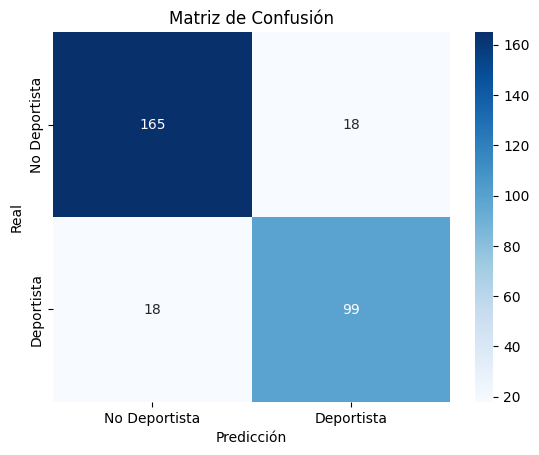

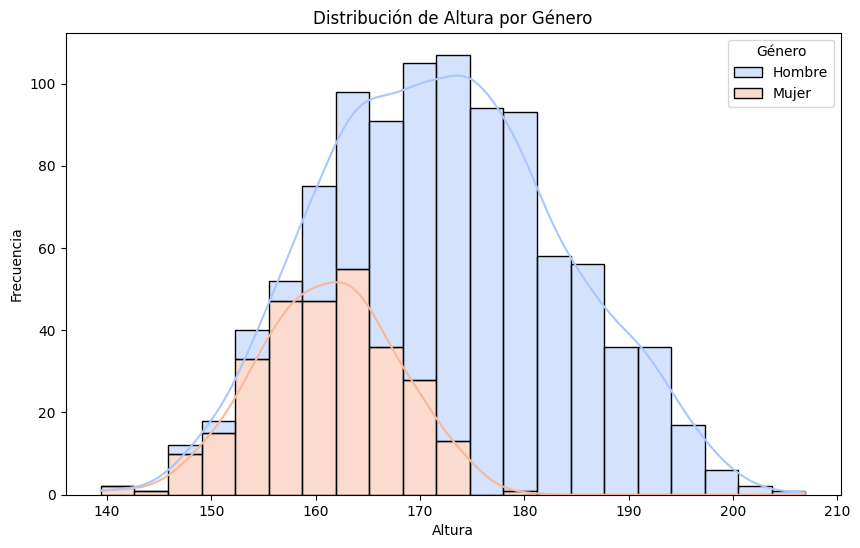

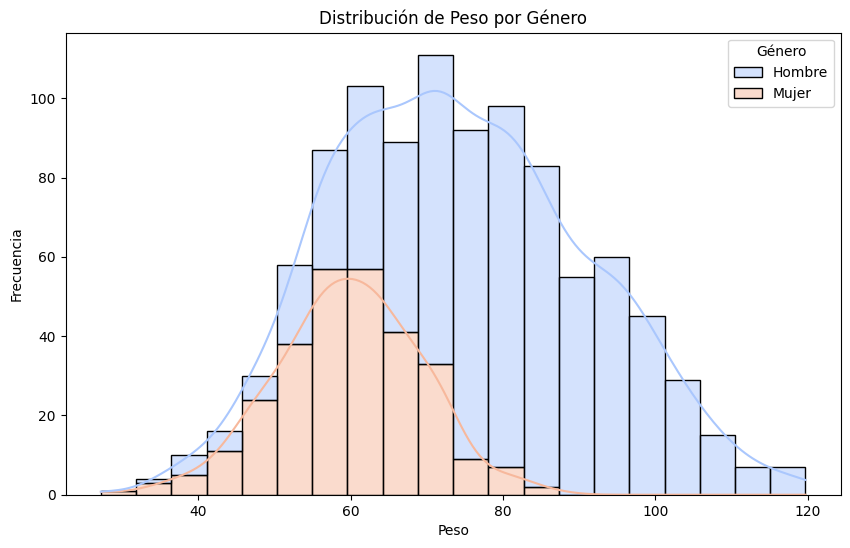

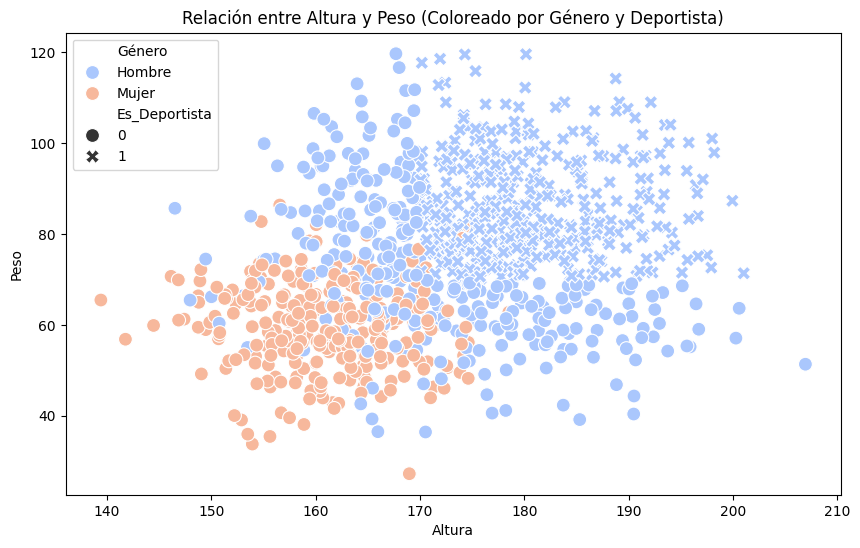

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Establecer semilla para reproducibilidad
np.random.seed(42)

# Crear un dataset simulado
n_samples = 1000
gender = np.random.choice(['Hombre', 'Mujer'], p=[0.7, 0.3], size=n_samples)  # 70% hombres, 30% mujeres
height = np.where(gender == 'Hombre', np.random.normal(175, 10, n_samples), np.random.normal(160, 7, n_samples))
age = np.random.randint(18, 60, size=n_samples)  # Edad entre 18 y 60 años
weight = np.where(gender == 'Hombre', np.random.normal(80, 15, n_samples), np.random.normal(60, 10, n_samples))

# Crear una variable objetivo (si es deportista o no)
# Asumimos que hay un ligero sesgo hacia hombres siendo clasificados como deportistas
is_athlete = np.where((gender == 'Hombre') & (height > 170) & (weight > 70), 1, 0)

# Crear un DataFrame
data = pd.DataFrame({'Género': gender, 'Altura': height, 'Edad': age, 'Peso': weight, 'Es_Deportista': is_athlete})

# Codificar el género como variable numérica para el modelo
data['Género_Num'] = data['Género'].map({'Hombre': 1, 'Mujer': 0})

# Mostrar conteos de observaciones
print("Conteo de observaciones por Género y Deportista:")
print(data['Género'].value_counts())
print("\nConteo de observaciones por Deportista (1=Deportista, 0=No Deportista):")
print(data['Es_Deportista'].value_counts())

# Separar las características y la variable objetivo
X = data[['Género_Num', 'Altura', 'Edad', 'Peso']]
y = data['Es_Deportista']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Deportista', 'Deportista'])

# Mostrar resultados
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nMatriz de Confusión:")
print(cm)
print("\nReporte de Clasificación:")
print(report)

# Visualización de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Deportista', 'Deportista'], yticklabels=['No Deportista', 'Deportista'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Gráficas adicionales para visualizar el sesgo

# Distribución de altura entre hombres y mujeres
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Altura', hue='Género', multiple='stack', palette='coolwarm', kde=True)
plt.title('Distribución de Altura por Género')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de peso entre hombres y mujeres
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Peso', hue='Género', multiple='stack', palette='coolwarm', kde=True)
plt.title('Distribución de Peso por Género')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre altura y peso, coloreado por deportista
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Altura', y='Peso', hue='Género', style='Es_Deportista', palette='coolwarm', s=100)
plt.title('Relación entre Altura y Peso (Coloreado por Género y Deportista)')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()
